## DATA ANALYSIS PORTFOLIO Project 1
#### Meenakshi Sharadha A 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
file_path = r"C:\Users\ameen\Desktop\PORTFOLIO\Online_Retail.xlsx"
df= pd.read_excel(file_path)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Data Inspection
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### 1. There are no null values
#### 2. Customer ID and Description seem to have missing data
#### 3. The minimum and maximum values of Quantity and UnitPrice and their standard deviation values show the presence of outliers - will be treated.

Text(0.5, 1.0, 'Distribution of Quantity')

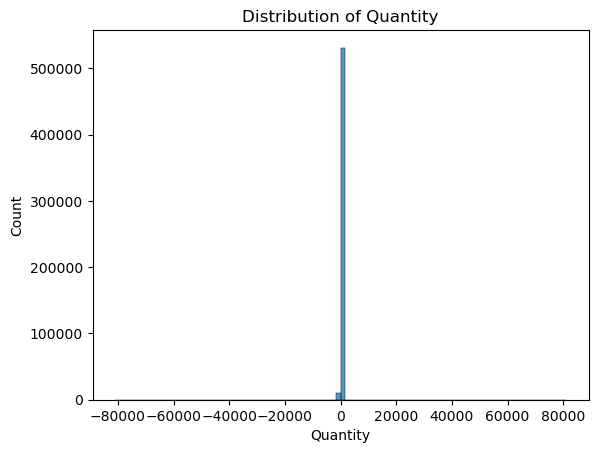

In [4]:
# Visualising the attribute UnitPrice to view outliers
sns.histplot(df['Quantity'], bins=100, kde=False)
plt.title("Distribution of Quantity")
# plt.xlim(-200, 200)  # Limit x-axis to the main range of values

<Axes: xlabel='UnitPrice', ylabel='Count'>

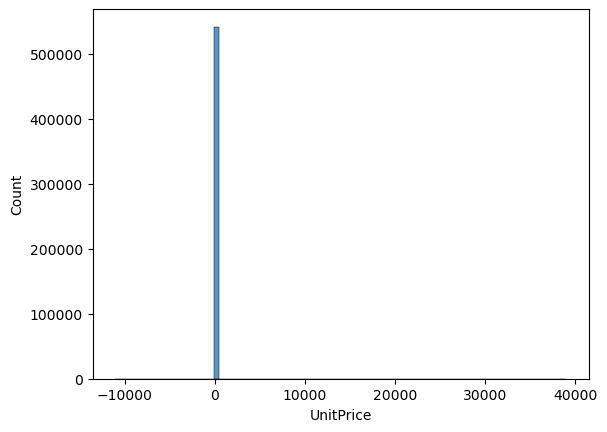

In [5]:
# Visualising Quantity attribute to view outliers

sns.histplot(df['UnitPrice'], bins=100, kde=False)

#### Clear visibility of extreme values (Outliers) in Quantity and Unit Price. These values will need to be removed so that the analysis carries on smoothly to give meaningful results

In [6]:
# Calculate IQR on Quantity
q1 = df['Quantity'].quantile(0.25)
q3 = df['Quantity'].quantile(0.75)

iqr = q3-q1

lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr


df_clean= df[(df['Quantity']>=lower_bound) & (df['Quantity']<=upper_bound)]

In [7]:
print(f"Rows before filtering: {len(df)}")
print(f"Rows after filtering: {len(df_clean)}")
print(f"Rows removed: {len(df_clean)/len(df)*100}")

Rows before filtering: 541909
Rows after filtering: 483290
Rows removed: 89.18287018669187


#### By following the IQR method of removing outliers, 11% of the data in the dataset has been removed - extreme outliers. The same will be followed for Unit Price

Text(0.5, 1.0, 'Distribution of Quantity')

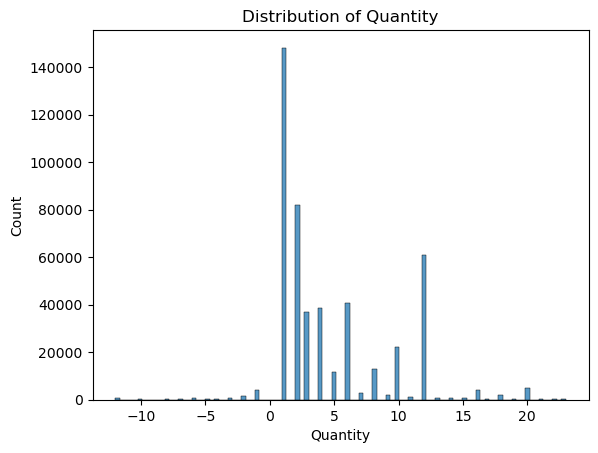

In [8]:
# Visualising the attribute UnitPrice to view outliers
sns.histplot(df_clean['Quantity'], bins=100, kde=False)
plt.title("Distribution of Quantity")
# plt.xlim(-200, 200)  # Limit x-axis to the main range of values

In [9]:
df_priceclean = df_clean[df_clean['UnitPrice']>0]

#### First the items with entries of their price below 0 are removed as that is clearly a data error.

In [10]:
price_q1 = df_priceclean['UnitPrice'].quantile(0.25)
price_q3 = df_priceclean['UnitPrice'].quantile(0.75)

iqr = price_q3-price_q1
upper_bound = price_q3+1.5*iqr

df_cleaned = df_priceclean[df_priceclean['UnitPrice']<=upper_bound]

In [11]:
print(f"Upper bound for UnitPrice: {upper_bound}")
print(f"Rows before cleaning: {len(df_clean)}")
print(f"Rows after price cleaning: {len(df_cleaned)}")

Upper bound for UnitPrice: 8.5
Rows before cleaning: 483290
Rows after price cleaning: 449480


<Axes: xlabel='UnitPrice', ylabel='Count'>

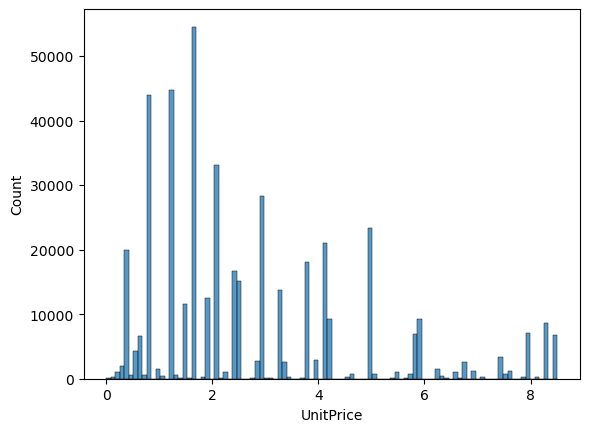

In [12]:
sns.histplot(df_cleaned['UnitPrice'], bins=100, kde=False)


#### By following the IQR method of removing outliers, a Unit price of 8.5 (upper bound) was chosen. Highly priced itms for unrealisatic and was hence removed. Now the values for Quantity and unit price seem more realistic and would yeild more accurate results upon analysis.

## EDA

In [13]:
df_cleaned.describe()
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
# Check number of unique customers, countries, products

print("No. of unique customers: ", df_cleaned['CustomerID'].nunique())
print("No. of unique countries: ", df_cleaned['Country'].nunique())
print("No. of unique products: ", df_cleaned['StockCode'].nunique())

No. of unique customers:  4206
No. of unique countries:  38
No. of unique products:  3710


### 1. Revenue Drivers by Country and Time

### Business Question “What are the main drivers of revenue—by time period (seasonality)?”

In [15]:
df_cleaned['Revenue']= df_cleaned['Quantity']* df_cleaned['UnitPrice']

C:\Users\ameen\AppData\Local\Temp\ipykernel_17736\2730073515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Revenue']= df_cleaned['Quantity']* df_cleaned['UnitPrice']


In [16]:
# Group by month-year
#.dt.to_period('M') will give month with the year
# .dt.year will give the month
# .dt.month will give the months but if many yeras are there, months will overlap

monthly_sales = df_cleaned.groupby(df_cleaned['InvoiceDate'].dt.to_period('M')).agg({
    'Revenue': 'sum',
    'InvoiceNo': 'nunique',   # number of unique orders
    'CustomerID': 'nunique'   # unique customers
}).reset_index()

monthly_sales['InvoiceDate'] = monthly_sales['InvoiceDate'].dt.to_timestamp()

monthly_sales.head()

,InvoiceDate,Revenue,InvoiceNo,CustomerID
0,2010-12-01,364800.390,1636,875
1,2011-01-01,292840.870,1177,727
2,2011-02-01,249938.450,1146,731
3,2011-03-01,322094.100,1549,956
4,2011-04-01,257307.371,1295,828


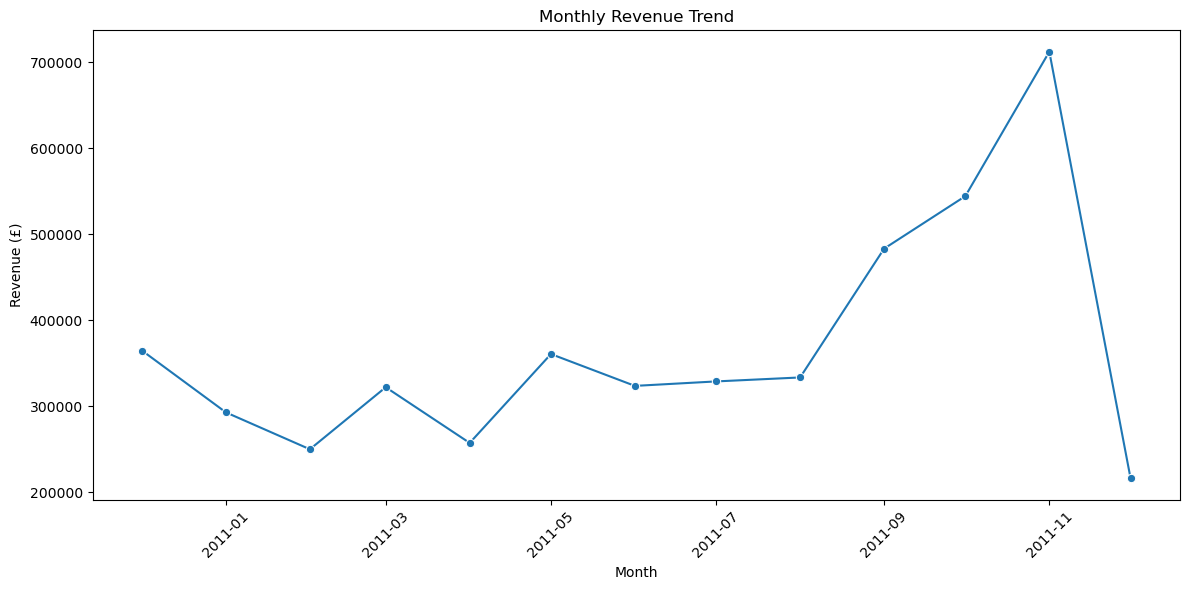

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(x='InvoiceDate', y='Revenue', data=monthly_sales, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Examining monthly aggregated revenue to identify any growth patterns, seasonality, or notable fluctuations that influence total revenue. Understanding these trends is crucial for forecasting demand, managing inventory, and planning marketing campaigns.

### Business Question "Which countries contribute the most to revenue for the online retailer during 2010–2011?"

In [18]:
countryrev = df_cleaned.groupby('Country').agg({
    'Revenue':'sum',
    'CustomerID':'nunique'
}).reset_index()

In [19]:
countryrev = countryrev.sort_values(by='Revenue', ascending = False)

Text(0.5, 1.0, 'Top 10 Countries by Total Revenue (2010–2011)')

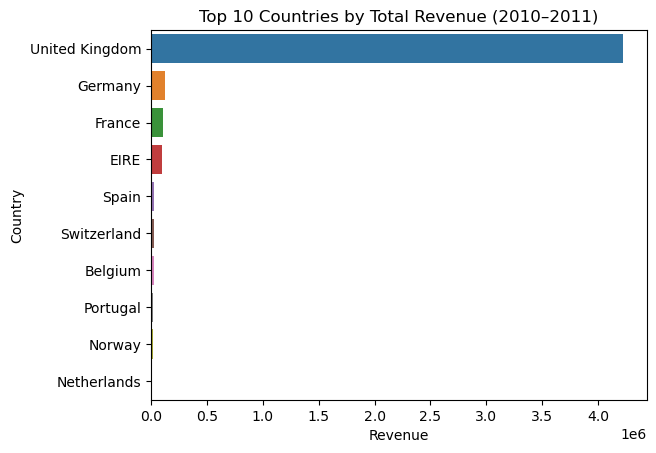

In [20]:
countryrev=countryrev.head(10)
sns.barplot(data=countryrev, y='Country', x='Revenue')
plt.title('Top 10 Countries by Total Revenue (2010–2011)')


#### The top 3 countries by revenue are typically the UK, Germany and France. The UK often dominates as it is where the business is based, but regional leaders may vary. Lower-revenue countries like Portugal, Norway and Netherlands may represent emerging markets or opportunities for expansion.

### Drill Down: Revenue by Month in Top Countries (Seasonality by Country)

In [36]:
# country | revenue

topcountries = countryrev['Country'].head(3).to_list()
topcountriesonly = df_cleaned[df_cleaned['Country'].isin(topcountries)]
revbymonth = (topcountriesonly.groupby([topcountriesonly['InvoiceDate'].dt.to_period('M'),'Country'])
['Revenue'].sum().reset_index())
revbymonth.head(10)


,InvoiceDate,Country,Revenue
0,2010-12,France,5337.06
1,2010-12,Germany,6754.15
2,2010-12,United Kingdom,336840.45
3,2011-01,France,9293.75
4,2011-01,Germany,9586.19
5,2011-01,United Kingdom,252571.27
6,2011-02,France,5621.27
7,2011-02,Germany,4507.76
8,2011-02,United Kingdom,222086.21
9,2011-03,France,6034.45


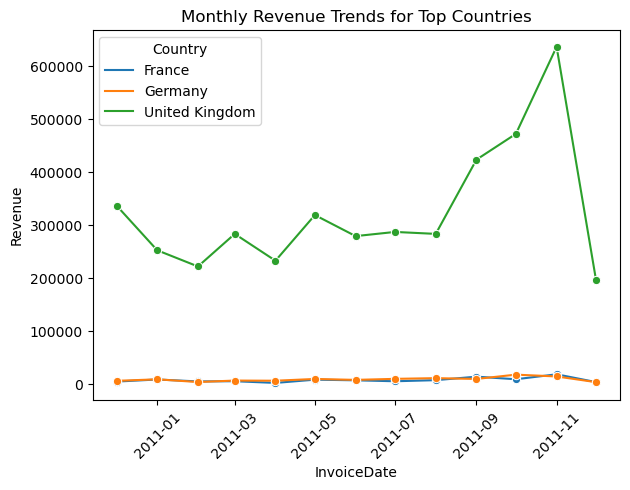

In [37]:
revbymonth['InvoiceDate'] = revbymonth['InvoiceDate'].dt.to_timestamp()
sns.lineplot(
    data=revbymonth,
    x='InvoiceDate', y='Revenue', hue='Country', marker='o'
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Monthly Revenue Trends for Top Countries')
plt.show()

### Top Products by Revenue

In [39]:
topproducts = df_cleaned.groupby('Description')['Revenue'].sum().sort_values(ascending = False).reset_index()
topproducts.head(10)

,Description,Revenue
0,PARTY BUNTING,34024.68
1,WHITE HANGING HEART T-LIGHT HOLDER,33820.47
2,JUMBO BAG RED RETROSPOT,32060.26
3,JAM MAKING SET WITH JARS,23045.26
4,SPOTTY BUNTING,22550.20
5,DOORMAT KEEP CALM AND COME IN,20789.41
6,PAPER CHAIN KIT 50'S CHRISTMAS,20222.26
7,NATURAL SLATE HEART CHALKBOARD,20114.16
8,LUNCH BAG RED RETROSPOT,19581.68
9,ASSORTED COLOUR BIRD ORNAMENT,19194.62


The top 10 products contributed disproportionately to total sales—a clear opportunity for focused stocking and targeted marketing campaigns around these bestsellers.

## 2. Customer Segmentation
### Business Question 1. Which customer segments (e.g., top spenders, one-time buyers, loyal repeaters) contribute most to revenue? How can we better retain and upsell them?

In [40]:
df_customers = df_cleaned[~df_cleaned['CustomerID'].isnull()].copy()

#### Calculate Recency, Frequency, and Monetary (RFM) for Each Customer